In [ ]:
'''main feature engineering techniques:

1. Missing data imputation

2. Categorical encoding

3. Variable transformation

4. Outlier engineering

5.  Date and time engineering'''


'main feature engineering techniques:\n\n1. Missing data imputation\n\n2. Categorical encoding\n\n3. Variable transformation\n\n4. Outlier engineering\n\n5.  Date and time engineering'

In [ ]:
#Missing Data Imputation for Feature Engineering
'''multiple techniques for missing data imputation. These are as follows:-

Complete case analysis
Mean / Median / Mode imputation
Missing Value Indicator'''

# Complete Case Analysis for Missing Data Imputation: use it when missing data size is small
import numpy as np
import pandas as pd
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")





In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data1= train.copy()
data1.isnull().mean()

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.198653
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:

print('total passengers with values in all variables: ', data1.dropna().shape[0])
print('total passengers in the Titanic: ', data1.shape[0])
print('percentage of data without missing values: ', data1.dropna().shape[0]/ float(data1.shape[0]))

total passengers with values in all variables:  183
total passengers in the Titanic:  891
percentage of data without missing values:  0.2053872053872054


In [ ]:
# mean/median/mode for missing data imputation
# Missing values can also be replaced with the mean, median, or mode of the variable(feature)
median = train.Age.median()
for df in [train, test]:
    df['Age'].fillna(median, inplace=True)
train['Age'].isnull().sum()


# 0 represents it has no null value

<ipython-input-8-1d8621145bfd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median, inplace=True)


0

In [ ]:
# missing value indicator for missing values indication : This technique involves adding a binary variable to indicate whether the value is missing for a certain observation. This variable takes the value 1 if the observation is missing, or 0 otherwise. But still need to replace the missing values in the original variable, which tend to do with mean or median imputation
train['Age_NA'] = np.where(train['Age'].isnull(), 1, 0)
test['Age_NA'] = np.where(test['Age'].isnull(), 1, 0)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
train.Age.mean(), train.Age.median()


(29.36158249158249, 28.0)

In [ ]:
train['Age'].fillna(train.Age.median(), inplace=True)
test['Age'].fillna(train.Age.median(), inplace=True)

train.head(10)

<ipython-input-11-2c034c8dc12a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train.Age.median(), inplace=True)
<ipython-input-11-2c034c8dc12a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [ ]:
''' categorical encoding in feature engineering

One-Hot encoding (OHE)
Ordinal encoding
Count and Frequency encoding
Target encoding / Mean encoding '''

# one Hot encoding : creates binary variables for each category present in the categorical variable
pd.get_dummies(train['Sex']).head()


,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [ ]:
pd.concat([train['Sex'], pd.get_dummies(train['Sex'])], axis=1).head()

,Sex,female,male
0,male,False,True
1,female,True,False
2,female,True,False
3,female,True,False
4,male,False,True


In [ ]:
pd.get_dummies(train['Sex'], drop_first=True).head()

,male
0,True
1,False
2,False
3,False
4,True


In [ ]:
# ordinal encoding : categories can be ordered and that too meaningfully
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
le.transform(["tokyo", "tokyo", "paris"])


array([2, 2, 1])

In [ ]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

In [ ]:
# target/mean encoding :  For example, there is a categorical variable “city”, and we want to predict if the customer will buy a TV provided we send a letter. If 30 percent of the people in the city “London” buy the TV, we would replace London with 0.3
data = [{'carname':['a','b','c','d','e'], 'target': [1,0,1,1,0]}]
df= pd.DataFrame(data)
df


,carname,target
0,"[a, b, c, d, e]","[1, 0, 1, 1, 0]"


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

In [ ]:
df.groupby(['carname'])['target'].count

<bound method GroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7ddff089f950>>

In [ ]:
df.groupby(['carname'])['target'].mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7ddfe6d07f10>>

In [ ]:
# variable transformation
# loading numerical features of the dataset
cols_reqiuired = ['Age', 'Fare', 'Survived']
train[cols_reqiuired].head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Fare'].plot(kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='Fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Fare', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Fare'].plot(kind='line', figsize=(8, 4), title='Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# filling the missing data with random sample
def impute(data, variable):
    df = train.copy()
    df[variable+'_random'] = df[variable]
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    return df[variable+'_random']
# fill na
train['Age'] = impute(train, 'Age')

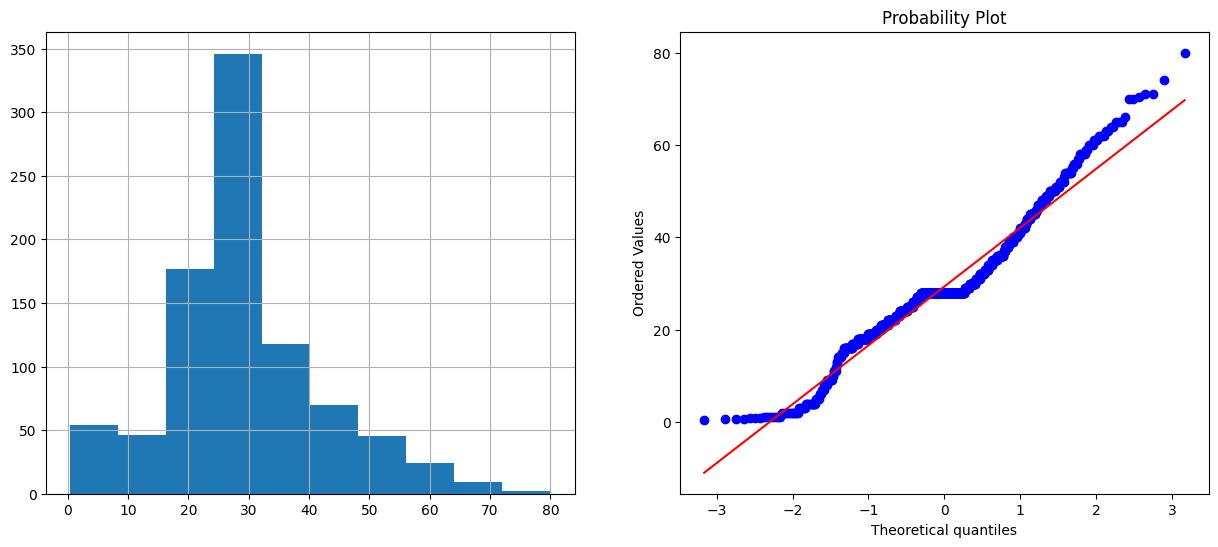

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy.stats as stats
def plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.show()
plots(train, 'Age')

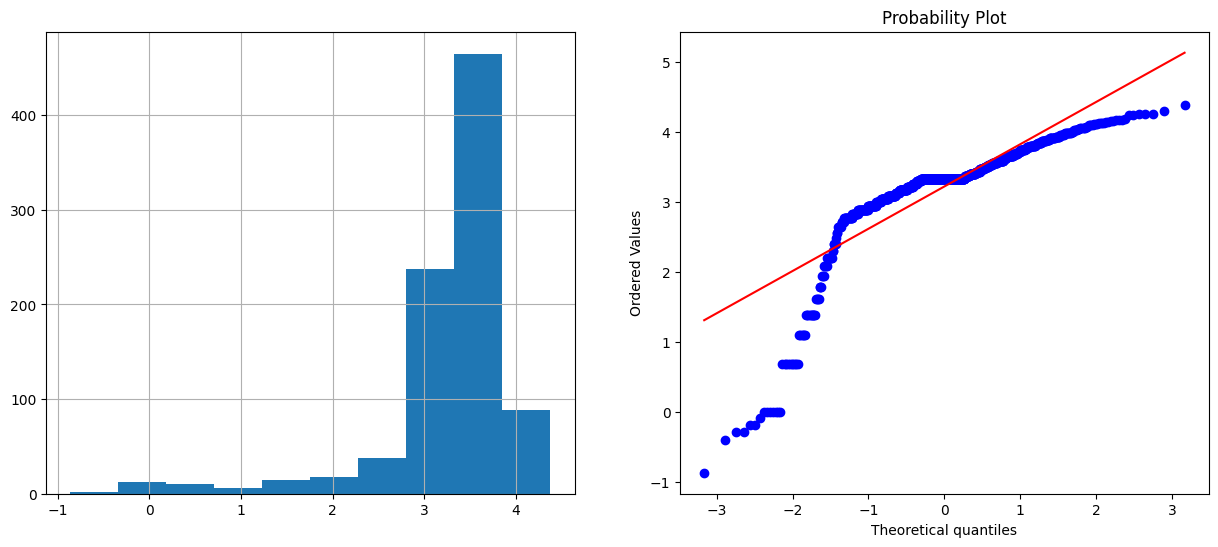

In [ ]:
# logarthimic transformation
train['Age_log'] = np.log(train.Age)
plots(train, 'Age_log')

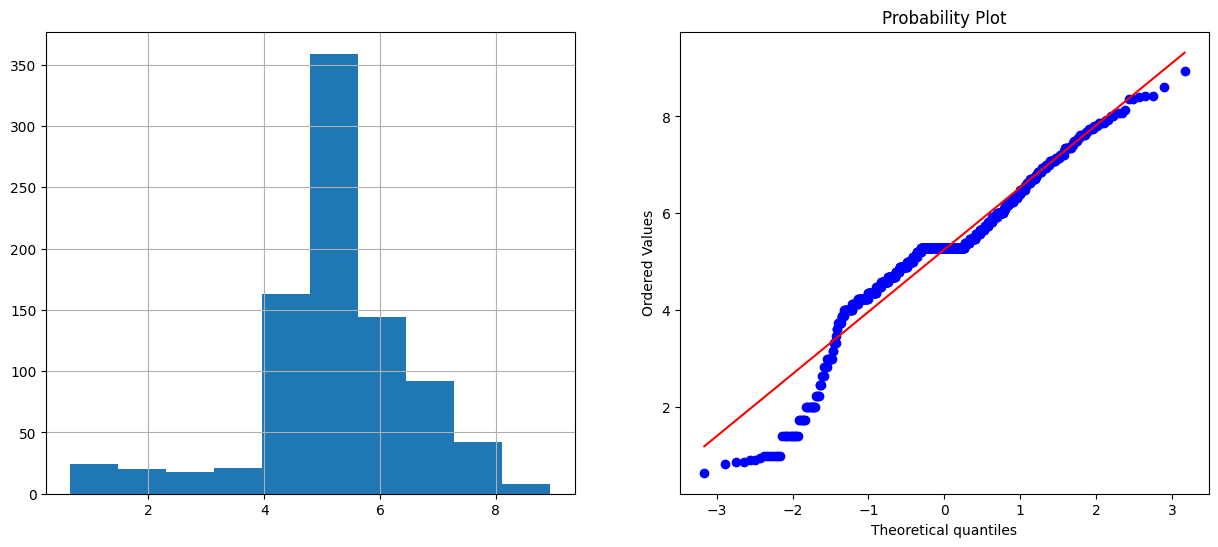

In [ ]:
# square root transformation
train['Age_sqr'] =train.Age**(1/2)
plots(train, 'Age_sqr')

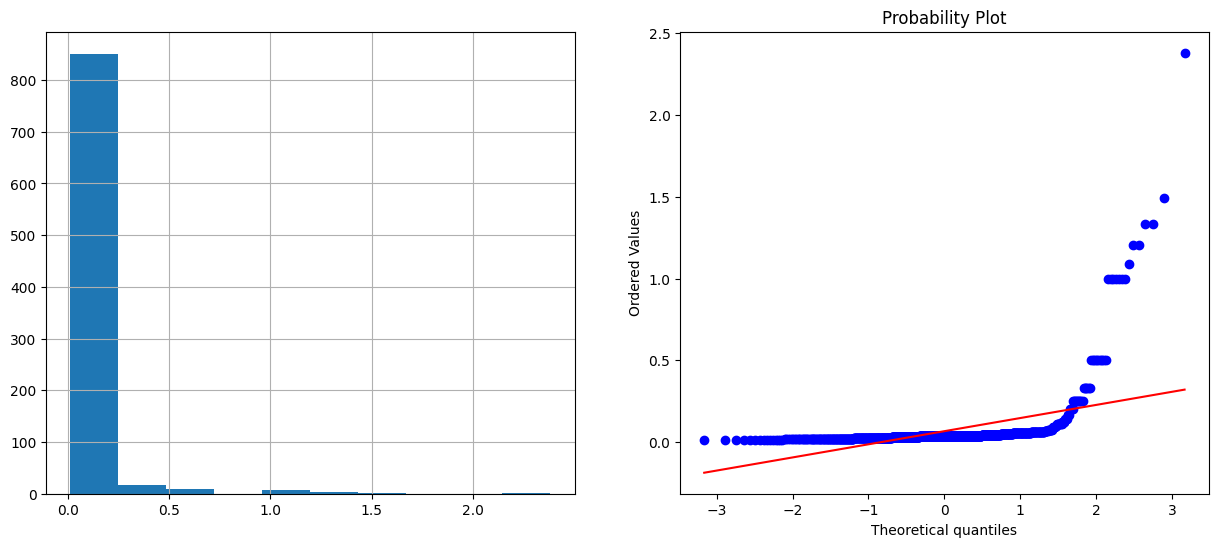

In [ ]:
# reciprocal transformation
train['Age_reciprocal'] = 1 / train.Age
plots(train, 'Age_reciprocal')


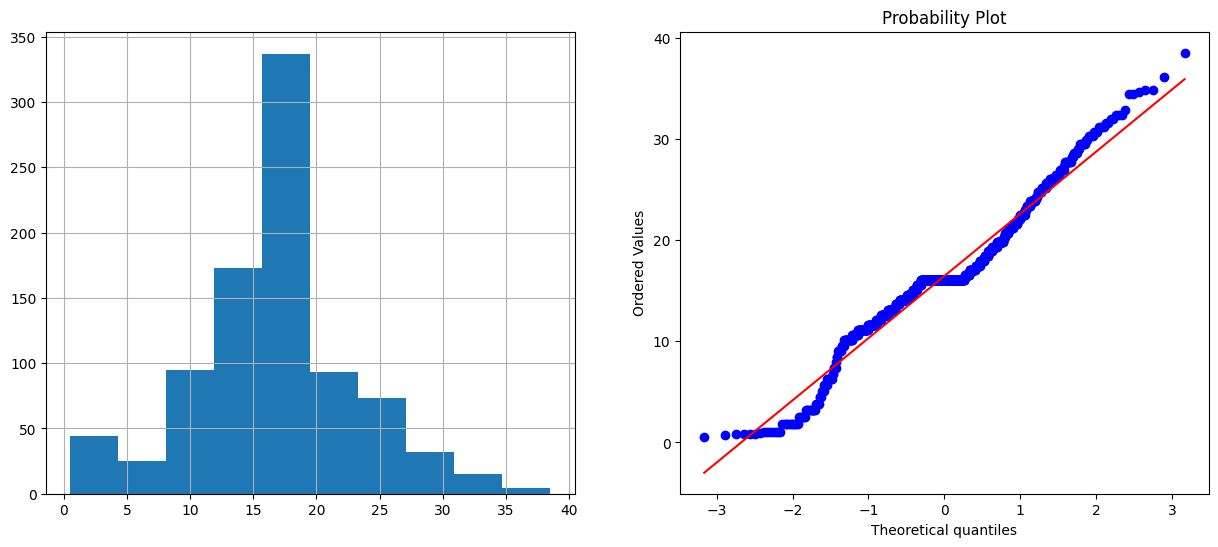

In [ ]:
# exponential transformation
train['Age_exp'] = train.Age**(1/1.2)
plots(train, 'Age_exp')

In [ ]:
# outlier engineering
'''techniques to handle outliers are:
outlier removal
treating outliers as missing values
outlier capping
'''


'techniques to handle outliers are:\noutlier removal\ntreating outliers as missing values\noutlier capping\n'

In [ ]:
# scalaing and normalizing data
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Sample DataFrame
data = {'age': [25, 30, 35, 40, 45], 'salary': [50000, 60000, 55000, 65000, 70000]}
df = pd.DataFrame(data)

# Standardize data
scaler_standard = StandardScaler()
df['age_standard'] = scaler_standard.fit_transform(df[['age']])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df['salary_minmax'] = scaler_minmax.fit_transform(df[['salary']])

# Robust Scaling
scaler_robust = RobustScaler()
df['salary_robust'] = scaler_robust.fit_transform(df[['salary']])

print(df)

   age  salary  age_standard  salary_minmax  salary_robust
0   25   50000     -1.414214           0.00           -1.0
1   30   60000     -0.707107           0.50            0.0
2   35   55000      0.000000           0.25           -0.5
3   40   65000      0.707107           0.75            0.5
4   45   70000      1.414214           1.00            1.0


In [ ]:
# feature creation : new features are created or modified to function a model with better performance
# polynomial features: creation of higher order features with existing features to capture more complex realtionships
# interation terms: features generated by combining several features to derive interactions between them
# domain specific feature generation : features designed based on intricacis of subject given within a problem realm

import pandas as pd
import numpy as np

# Sample DataFrame
data = {'x1': [1, 2, 3, 4, 5], 'x2': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Polynomial Features
df['x1_squared'] = df['x1'] ** 2
df['x1_x2_interaction'] = df['x1'] * df['x2']

print(df)

   x1  x2  x1_squared  x1_x2_interaction
0   1  10           1                 10
1   2  20           4                 40
2   3  30           9                 90
3   4  40          16                160
4   5  50          25                250


In [ ]:
# dimensionalty reduction
import pandas as pd
from sklearn.decomposition import PCA

# Sample DataFrame
data = {'feature1': [2.5, 0.5, 2.2, 1.9, 3.1], 'feature2': [2.4, 0.7, 2.9, 2.2, 3.0]}
df = pd.DataFrame(data)

# Use PCA for Dimensionality Reduction pca:pricipal component analysis
pca = PCA(n_components=1)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns=['principal_component'])

print(df_pca)

   principal_component
0             0.443624
1            -2.177194
2             0.570712
3            -0.129025
4             1.291882


In [ ]:
# time series feature engineering
# lag features : formal data points are used to derive model predictive features
# rolling statistics : data statistics are calculated accross data windows, such as rolling means
# seasonal decomposition : data is partioned into signal, trend,normal noise categories

import pandas as pd
import numpy as np
# Sample DataFrame
date_rng = pd.date_range(start='1/1/2022', end='1/10/2022', freq='D')
data = {'date': date_rng, 'value': [100, 110, 105, 115, 120, 125, 130, 135, 140, 145]}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

# Lag Features
df['value_lag1'] = df['value'].shift(1)

# Rolling Statistics
df['value_rolling_mean'] = df['value'].rolling(window=3).mean()

print(df)

            value  value_lag1  value_rolling_mean
date                                             
2022-01-01    100         NaN                 NaN
2022-01-02    110       100.0                 NaN
2022-01-03    105       110.0          105.000000
2022-01-04    115       105.0          110.000000
2022-01-05    120       115.0          113.333333
2022-01-06    125       120.0          120.000000
2022-01-07    130       125.0          125.000000
2022-01-08    135       130.0          130.000000
2022-01-09    140       135.0          135.000000
2022-01-10    145       140.0          140.000000


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,Age_log,Age_sqr,Age_reciprocal,Age_exp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,3.091042,4.690416,0.045455,13.142729
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,3.637586,6.164414,0.026316,20.724608
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3.258097,5.099020,0.038462,15.105825
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,3.555348,5.916080,0.028571,19.351889
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,3.555348,5.916080,0.028571,19.351889


In [ ]:

import pandas as pd

# Analysis of survival rate based on passenger class
print("\nSurvival rate by passenger class:")
print(train.groupby('Pclass')['Survived'].mean())

# Analysis of survival rate based on sex
print("\nSurvival rate by sex:")
print(train.groupby('Sex')['Survived'].mean())

# Analysis of survival rate based on age (grouped into bins)
train['Age_Group'] = pd.cut(train['Age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])
print("\nSurvival rate by age group:")
print(train.groupby('Age_Group')['Survived'].mean())

# Analysis of survival rate based on embarkation port
print("\nSurvival rate by embarkation port:")
print(train.groupby('Embarked')['Survived'].mean())


# Analysis of the relationship between fare and survival
print("\nCorrelation between Fare and Survival:")
print(train['Fare'].corr(train['Survived']))

# Analysis of survival rate based on family size (SibSp + Parch)
train['FamilySize'] = train['SibSp'] + train['Parch']
print("\nSurvival rate by family size:")
print(train.groupby('FamilySize')['Survived'].mean())



Survival rate by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by age group:
Age_Group
Child     0.503597
Adult     0.364247
Senior    0.125000
Name: Survived, dtype: float64

Survival rate by embarkation port:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Correlation between Fare and Survival:
0.2573065223849625

Survival rate by family size:
FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


<ipython-input-34-3dd67d105049>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby('Age_Group')['Survived'].mean())
